In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
maxmara = pd.read_csv('maxmara_cleaned.csv')
netaporter = pd.read_csv('netaporter_AI.csv')
luisaviaroma = pd.read_csv('luisaviaroma_AI.csv')

###  Price Comparison Across Platforms

In [7]:
avg_price_maxmara = maxmara['current_price'].mean()
avg_price_netaporter = netaporter['current_price'].mean()
avg_price_luisaviaroma = luisaviaroma['current_price'].mean()

price_diff_netaporter = ((avg_price_netaporter - avg_price_maxmara) / avg_price_maxmara) * 100
price_diff_luisaviaroma = ((avg_price_luisaviaroma - avg_price_maxmara) / avg_price_maxmara) * 100

In [8]:
print(price_diff_netaporter)
print(price_diff_luisaviaroma)

8.096911348509526
-12.149629706015194


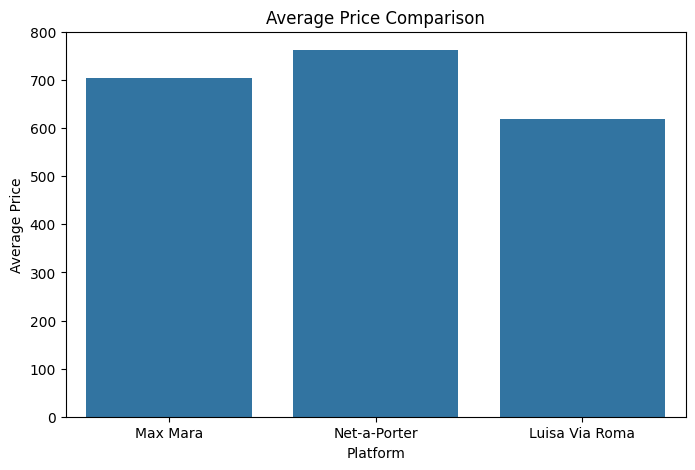

In [9]:
avg_prices = {
    "Max Mara": maxmara['current_price'].mean(),
    "Net-a-Porter": netaporter['current_price'].mean(),
    "Luisa Via Roma": luisaviaroma['current_price'].mean()
}

# Create a bar plot with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_prices.keys()), y=list(avg_prices.values()))
plt.xlabel("Platform")
plt.ylabel("Average Price")
plt.title("Average Price Comparison")
plt.savefig("average_price_comparison.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution
plt.show()

###  Discount Comparison Across Platforms

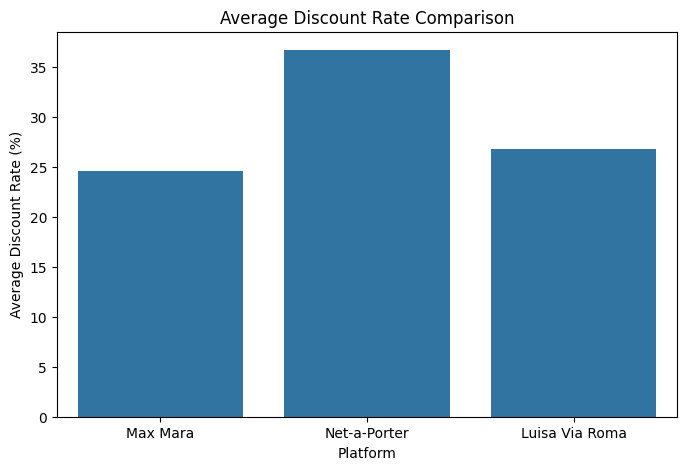

In [11]:
maxmara['discount_rate'] = (maxmara['previous_price'] - maxmara['current_price']) / maxmara['previous_price'] * 100
netaporter['discount_rate'] = (netaporter['previous_price'] - netaporter['current_price']) / netaporter['previous_price'] * 100
luisaviaroma['discount_rate'] = (luisaviaroma['previous_price'] - luisaviaroma['current_price']) / luisaviaroma['previous_price'] * 100

avg_discounts = {
    "Max Mara": maxmara['discount_rate'].mean(),
    "Net-a-Porter": netaporter['discount_rate'].mean(),
    "Luisa Via Roma": luisaviaroma['discount_rate'].mean()
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_discounts.keys()), y=list(avg_discounts.values()))
plt.xlabel("Platform")
plt.ylabel("Average Discount Rate (%)")
plt.title("Average Discount Rate Comparison")
plt.savefig("average_discount_comparison.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution
plt.show()

### Material Distribution Across Platforms

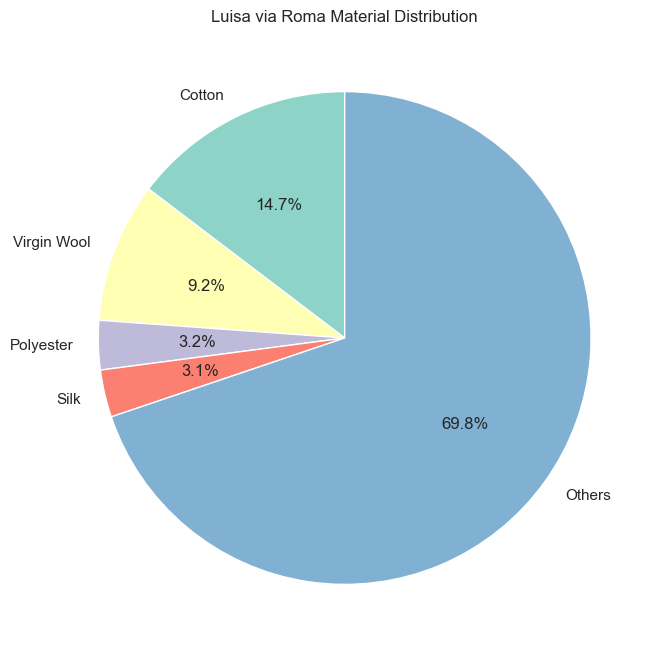

In [22]:
material_counts = luisaviaroma['Material'].value_counts()

top_materials = material_counts.nlargest(4)
others = material_counts.iloc[4:].sum()

material_data = pd.concat([top_materials, pd.Series({'Others': others})])

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")

plt.pie(material_data, labels=material_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(material_data)))
plt.title('Luisa via Roma Material Distribution')
plt.savefig("luisaviaroma_Material_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

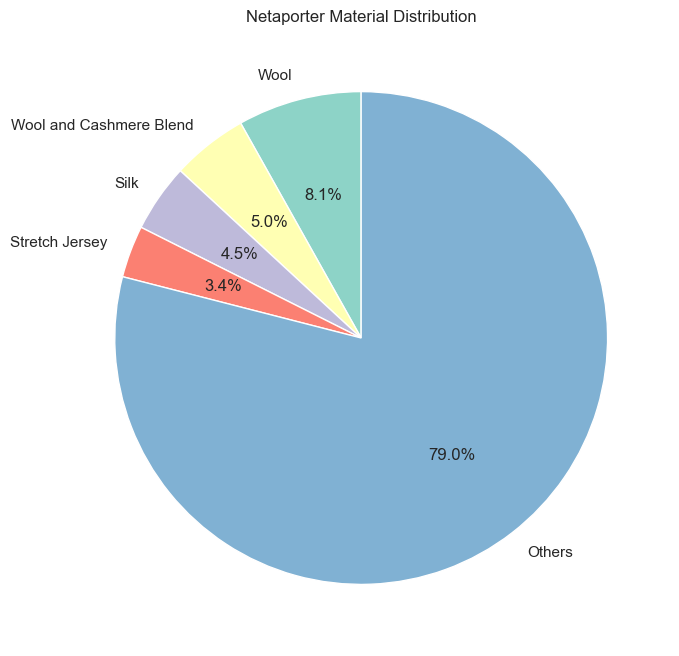

In [20]:
material_counts = netaporter['Material'].value_counts()

top_materials = material_counts.nlargest(4)
others = material_counts.iloc[4:].sum()

material_data = pd.concat([top_materials, pd.Series({'Others': others})])

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")

plt.pie(material_data, labels=material_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(material_data)))
plt.title('Netaporter Material Distribution')
plt.savefig("netaporter_Material_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

### Top Product Categories on Net-a-Porter vs. Luisa Via Roma

C:\Users\omidg\AppData\Local\Temp\ipykernel_11356\875284634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_netaporter.index, y=top_categories_netaporter.values, ax=axes[0], palette='Set3')
C:\Users\omidg\AppData\Local\Temp\ipykernel_11356\875284634.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_luisaviaroma.index, y=top_categories_luisaviaroma.values, ax=axes[1], palette='Set3')


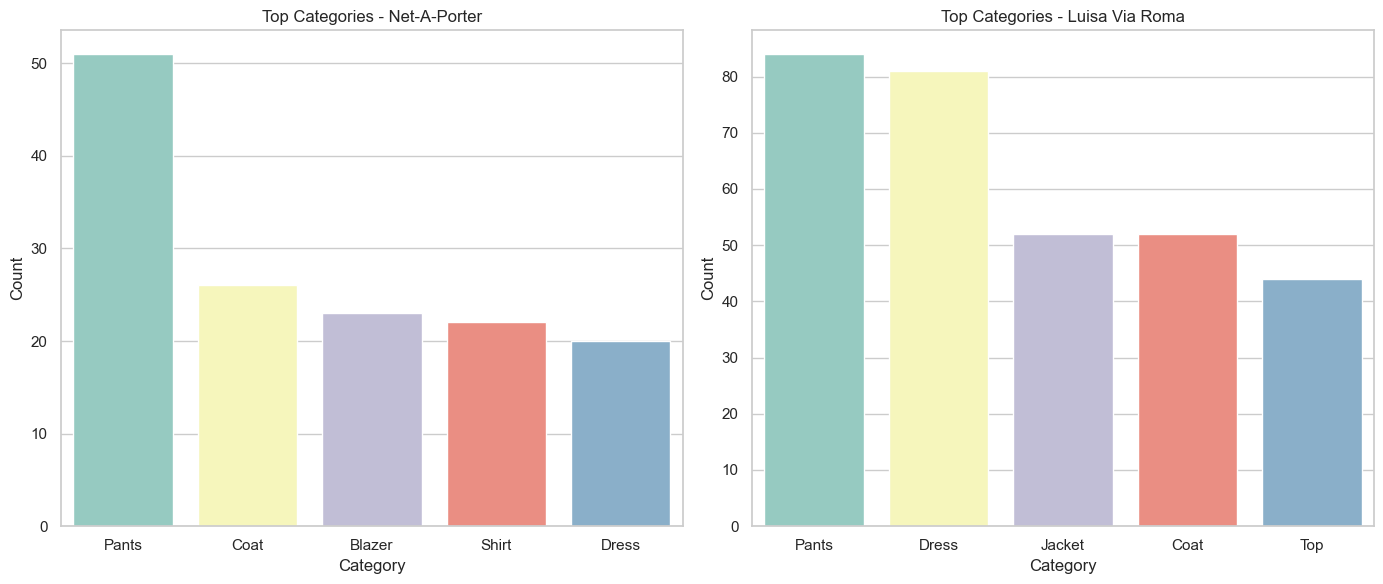

In [32]:
top_categories_netaporter = netaporter['Category'].value_counts().head(5)
top_categories_luisaviaroma = luisaviaroma['Category'].value_counts().head(5)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.set(style="whitegrid")

sns.barplot(x=top_categories_netaporter.index, y=top_categories_netaporter.values, ax=axes[0], palette='Set3')
axes[0].set_title('Top Categories - Net-A-Porter')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

sns.barplot(x=top_categories_luisaviaroma.index, y=top_categories_luisaviaroma.values, ax=axes[1], palette='Set3')
axes[1].set_title('Top Categories - Luisa Via Roma')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig("top_categories.png", dpi=300, bbox_inches="tight") 
plt.show()